# Analyse, classification et indexation des données: feuille 7
### Réduction de dimension - Analyse en Composantes Principales (ACP)

In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Avant de commencer

Ecrire une fonction <code> droite2DVd(x, vd, point) </code> permettant de calculer les ordonnées des points <code>(x, ?)</code> de la droite de vecteur directeur <code>vd</code> passant par le point <code>point</code>. Le paramètre <code>x</code> est un vecteur numpy, <code>vd</code> est un tuple <code>(a,b)</code>, <code>point</code> est un tuple <code>(xp, yp)</code>.
Testez votre fonction.

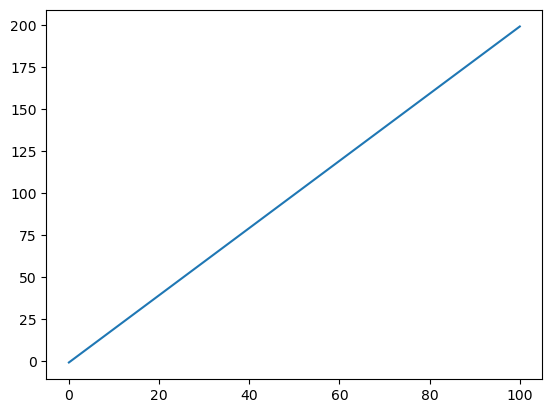

In [2]:
### CORRECTION
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def droite2DVd(x, vd, point): 
    return vd[1] / vd[0] * (x - point[0]) + point[1]

xd = np.array([0, 100])
yd = droite2DVd(xd, vd=(1,2), point=(1,1))

plt.plot(xd, yd)

### Exercice 1.

Dans cet exercice, on considère le même dataset que pour le TD précédent (feuille 6). Nous avons un descripteur de taille 2 : chaque poisson est décrit par sa longueur et sa brillance. L'objectif de l'exercice est de passer d'un descripteur de taille 2 à un descripteur de taille 1.

Commencez par charger les données.


In [3]:
### CORRECTION
import pandas as pa
data = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv', delimiter=';', decimal='.')
data = data.sample(frac=1)
data.head()

,lightness,width,species
115,5.428143,7.463178,0
58,5.401217,7.100131,0
1443,11.801394,11.160195,1
254,4.213442,8.876803,0
612,4.564266,8.321181,0


In [4]:
### CORRECTION
X = data[['width', 'lightness']]
y = data.species

1- Ecrire   une   fonction  <code>calculACP(echantillon, d=1)</code> qui réalise l'ACP sur un ensemble d'exemples. Chaque ligne de <code>echantillon</code> (DataFrame) contient les descripteurs associés à un exemple. La fonction retourne les <code>d</code> vecteurs propres calculés de plus grandes valeurs propres. Ils seront triés en fonction de leur valeur propre, de la plus grande à la plus petite. Tester la fonction sur le dataset.

In [5]:
### CORRECTION
import numpy as np
from numpy.linalg import eig 
def calculACP(echantillon, d=1):
    # si on veut des données centrées réduites
    echantillon = echantillon - np.mean(echantillon)
    echantillon = echantillon / np.std(echantillon)
    n = echantillon.shape[0]
    print('Cov: ', echantillon.cov())
    scatterM = (n-1) * echantillon.cov()
    print(scatterM)
    lambdas, vp = eig(scatterM)
    print('lambdas: ', lambdas)
    print('vp: ', vp)
    sorted_index = np.argsort(lambdas)[::-1]
    print(sorted_index)
    sorted_lambdas = lambdas[sorted_index]
    sorted_vp = vp[:,sorted_index]   
    vp_subset = sorted_vp[:,0:d]
    return vp_subset

vp = calculACP(X)
print(vp)

Cov:                width  lightness
width      1.000667   0.562161
lightness  0.562161   1.000667
                 width    lightness
width      1500.000000   842.679077
lightness   842.679077  1500.000000
lambdas:  [ 657.32092306 2342.67907694]
vp:  [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[1 0]
[[-0.70710678]
 [-0.70710678]]


2- Ecrire une fonction <code>projection (W, echantillon)</code>  qui prend une matrice de
projection <code>W</code> et un échantillon et qui retourne la projection de cet
ensemble. 

In [6]:
### CORRECTION
def projection(W, echantillon):
    #return np.dot(W.transpose(), echantillon.transpose()).transpose()
    return np.matmul(echantillon, W)

W = calculACP(X)
X_proj = projection(W, X)
# print(X_proj)

Cov:                width  lightness
width      1.000667   0.562161
lightness  0.562161   1.000667
                 width    lightness
width      1500.000000   842.679077
lightness   842.679077  1500.000000
lambdas:  [ 657.32092306 2342.67907694]
vp:  [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[1 0]


3- Visualiser le résultat de la réduction de dimension sur le dataset. Vous afficherez le nuage de points initial en 2D et la projection de ce nuage en 1D.

##### Avant la projection : 

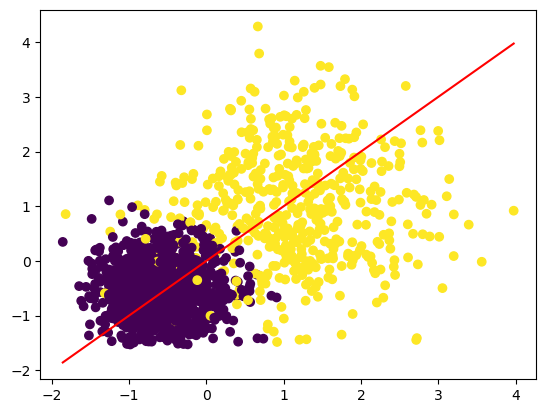

In [7]:
### CORRECTION
X = X - np.mean(X)
X = X / np.std(X)
plt.scatter(X['width'], X['lightness'], c=data['species'])
xmin = X['width'].min()
xmax = X['width'].max()
xd = np.array([xmin, xmax])
yd = droite2DVd(xd, vd=W, point=(0,0))

plt.plot(xd, yd, c='r')

#### Après la projection :

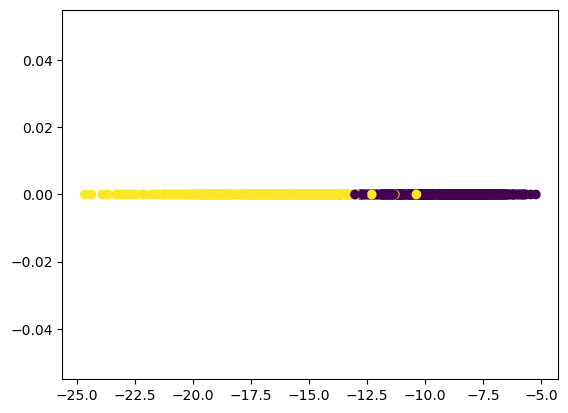

In [8]:
### CORRECTION
plt.scatter(X_proj, np.zeros(X_proj.shape[0]), c=data['species'])

4- En utilisant un classifieur bayésien MAP, comparez les résultats obtenus avec l'échantillon brut (descripteur de dimension 2) et les résultats obtenus avec l'échantillon projeté sur l’axe de plus grande valeur propre (descripteur de dimension 1). Comparez également les temps d'entraînement.

In [9]:
### CORRECTION
#Sans réduction de dimension :
data = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv', delimiter=';', decimal='.')
data = data.sample(frac=1)
X = data[['width', 'lightness']]
y = data.species

In [10]:
### CORRECTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
### CORRECTION
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
print('Sans réduction :')
%timeit nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',acc)

Sans réduction :
2.83 ms ± 7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
accuracy:  0.968


In [12]:
### CORRECTION
#Après réduction de dimension :

W = calculACP(X_train)
X_train_proj = projection(W, X_train)
X_test_proj = projection(W, X_test)

nb = GaussianNB()
print('Après réduction :')
%timeit nb.fit(X_train_proj, y_train)
y_pred = nb.predict(X_test_proj)
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',acc)

Cov:                width  lightness
width      1.000890   0.563228
lightness  0.563228   1.000890
                 width    lightness
width      1125.000000   633.068309
lightness   633.068309  1125.000000
lambdas:  [ 491.93169144 1758.06830856]
vp:  [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[1 0]
Après réduction :
2.36 ms ± 6.58 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
accuracy:  0.936


5- Même question avec un $k$-nn.

In [13]:
### CORRECTION
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [14]:
### CORRECTION
#Sans réduction :
print('Sans réduction knn : ')
%timeit knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',acc)

Sans réduction knn : 
2.65 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
accuracy:  0.9546666666666667


In [15]:
### CORRECTION
#Après réduction :
print('Après réduction knn : ')
%timeit knn.fit(X_train_proj, y_train)
y_pred = knn.predict(X_test_proj)
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',acc)

Après réduction knn : 
2.25 ms ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
accuracy:  0.928


### Exercice 2.

Dans cet exercice, nous allons travailler avec un dataset contenant des données sur le cancer du sein. Le dataset 
peut être chargé par l'instruction <code> load_breast_cancer</code> de la bibliothèque <code>sklearn.datasets</code>.

Commencer par charger les données, et les explorer.



In [16]:
### CORRECTION
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
### CORRECTION
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
### CORRECTION
print(data.data.shape)

(569, 30)


In [19]:
### CORRECTION
X = data.data
y = data.target

1- Faites une ACP en utilisant le module <code>PCA</code> de la bibliothèque <code>sklearn.decomposition</code>.  

Attention : pensez à centrer et réduire vos données.

In [20]:
### CORRECTION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z = scaler.fit_transform(X)

In [21]:
### CORRECTION
from sklearn.decomposition import PCA
acp = PCA()

In [22]:
### CORRECTION
coord = acp.fit_transform(z)
print(acp.n_components_)
print(acp.explained_variance_ratio_)

30
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


2- Affichez l'éboulie des valeurs propres et indiquer le nombre d'axes à retenir en utilisant le critère du coude. 

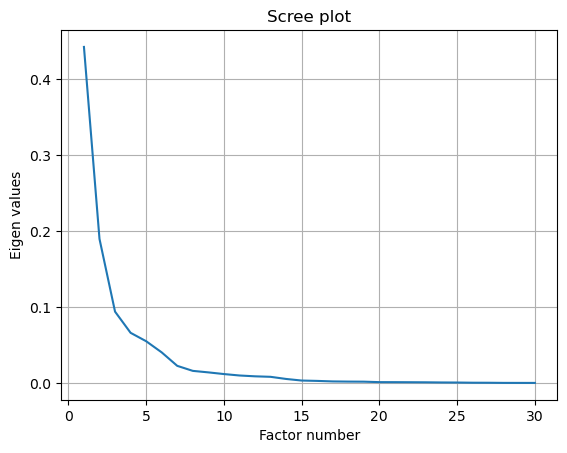

In [23]:
### CORRECTION
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.grid()
plt.plot(np.arange(1,acp.n_components_+1),acp.explained_variance_ratio_) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

In [24]:
### CORRECTION
#On peut choisir de ne retenir que les trois premiers axes. Voire 4 si la variance totale augmente vraiment :
p = 3
acp = PCA(n_components=p)
coord = acp.fit_transform(z)
print(acp.explained_variance_ratio_.sum())

0.7263637090898809


In [25]:
### CORRECTION
p = 4
acp = PCA(n_components=p)
coord = acp.fit_transform(z)
print(acp.explained_variance_ratio_.sum())

#Le gain en rajoutant une composante n'est pas très significatif.

0.7923850582436454


3- Combien d'axes faut-il retenir pour garder au moins 80% de la variance ?

In [26]:
### CORRECTION
p = 1
total_variance = 0
while total_variance < .8 :
    acp = PCA(n_components=p)
    coord = acp.fit_transform(z)
    total_variance = acp.explained_variance_ratio_.sum()
    p += 1
print('p = ', p)
print('total explained variance ratio: ', total_variance)

p =  6
total explained variance ratio:  0.8473427431679852


4- En ne gardant que 3 axes,  étudier l'impact de la réduction sur la qualité d'un classifieur de votre choix. 

In [27]:
### CORRECTION
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

nb = GaussianNB()
print('Sans réduction :')
X_train, X_test, y_train, y_test = train_test_split(X, y)
%timeit nb.fit(X_train, y_train)
print(X_train.shape)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',acc)

Sans réduction :
1.64 ms ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
(426, 30)
accuracy:  0.958041958041958


In [28]:
### CORRECTION
print('Après réduction :')

nb = GaussianNB()

scaler.fit(X_train)
z = scaler.transform(X_train)
p = 3
acp = PCA(n_components=p)
X_train_proj = acp.fit_transform(z)
print(X_train_proj.shape) 
%timeit nb.fit(X_train_proj, y_train)

z = scaler.transform(X_test)
X_test_proj = acp.transform(z)
y_pred = nb.predict(X_test_proj)
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',acc)

Après réduction :
(426, 3)
1.28 ms ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
accuracy:  0.916083916083916


5- Commenter les résultats

### CORRECTION
On voit que le temps d'entraînement diminue et que l'accuracy est légèrement moins bonne.